In [173]:
import numpy as np
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import os
from tqdm.auto import tqdm
# os.chdir('Projects/pb-stylistic')

In [12]:
### Most Frequent Words

dir_name = 'ridero10/polka/raw_chunks'

k = 2000

data = []
lengths = []
classes = []
for filename in sorted(os.listdir(dir_name)):
    with open(os.path.join(dir_name, filename), encoding='utf-8') as book:
        content = book.read()
        data.append(content)
        lengths.append(len(re.findall(u"(?u)\\b\\w+\\b", content)))
        classes.append(filename.rsplit('_', 1)[0])

dat = np.array(data)
len_train = np.array(lengths)

#### delta

cv_mfw = CountVectorizer(max_features=k, token_pattern=u"(?u)\\b\\w+\\b").fit(data)
td = pd.DataFrame(cv_mfw.transform(data).todense())
td.columns = sorted(cv_mfw.vocabulary_)

freqs = td.div(len_train, axis=0)
sclr = StandardScaler().fit(freqs)
freqs_sc = sclr.transform(freqs)

dir_name = 'ridero10/raw_chunks'
data_test = []
len_test = []
classes_test = []
for filename in sorted(os.listdir(dir_name)):
    with open(os.path.join(dir_name, filename), encoding='utf-8') as book:
        content = book.read()
        data_test.append(content)
        len_test.append(len(re.findall(u"(?u)\\b\\w+\\b", content)))
        classes_test.append(filename.rsplit('_', 1)[0])
        
data_test = np.array(data_test)
len_test = np.array(len_test)

td = pd.DataFrame(cv_mfw.transform(data_test).todense())
td.columns = sorted(cv_mfw.vocabulary_)
freqs_test = td.div(len_test, axis=0)
freqs_test_sc = sclr.transform(freqs_test)

In [15]:
freqs_test_sc

array([[-0.44026609, -0.09200925, -0.1721712 , ..., -0.23245462,
        -0.35778334, -0.16591448],
       [-0.76241189, -0.09200925,  3.0613522 , ..., -0.23245462,
        -0.35778334, -0.16591448],
       [-1.09395094, -0.09200925, -0.1721712 , ..., -0.23245462,
        -0.35778334, -0.16591448],
       ...,
       [-0.97835316, -0.09200925, -0.1721712 , ..., -0.23245462,
         1.55937682, -0.16591448],
       [-1.27927673, -0.09200925, -0.1721712 , ..., -0.23245462,
        -0.35778334, -0.16591448],
       [-0.79042986, -0.09200925, -0.1721712 , ..., -0.23245462,
        -0.35778334, -0.16591448]])

In [21]:
from scipy.spatial import distance

In [34]:
distance.cdist(freqs_test_sc, freqs_sc, metric='cosine').min(axis=1)

array([0.76464983, 0.86582846, 0.85495548, 0.86906192, 0.87766351,
       0.84876626, 0.8464974 , 0.86959213, 0.88488615, 0.88911924,
       0.85707505, 0.87923339, 0.85905799, 0.7324413 , 0.70325554,
       0.80987924, 0.74754774, 0.72593858, 0.85632452, 0.87406795,
       0.86337896, 0.86122886, 0.80429803, 0.85709369, 0.83293687,
       0.86371647, 0.85140132, 0.8500446 , 0.80130365, 0.87237311,
       0.82444698, 0.80337457, 0.86095333, 0.80085197, 0.86060408,
       0.83999813, 0.83929598, 0.86151881, 0.86473643])

In [35]:
distance.cdist(freqs_test_sc, freqs_sc, metric='cosine').argmin(axis=1)

array([3411, 2144, 2903, 1214, 3716,  121,   96, 4078,  218,  624, 1793,
        689, 4214, 3266, 3266, 3266, 3266, 3266,  354, 5003, 2752, 2936,
       4719,   95,  526, 1594, 3298, 3104,  647, 3173, 2331, 2733, 4876,
        617, 3847, 3435, 2398, 3200, 1511])

In [179]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", len(set(classes_test)))

In [88]:
from sklearn.manifold.t_sne import TSNE

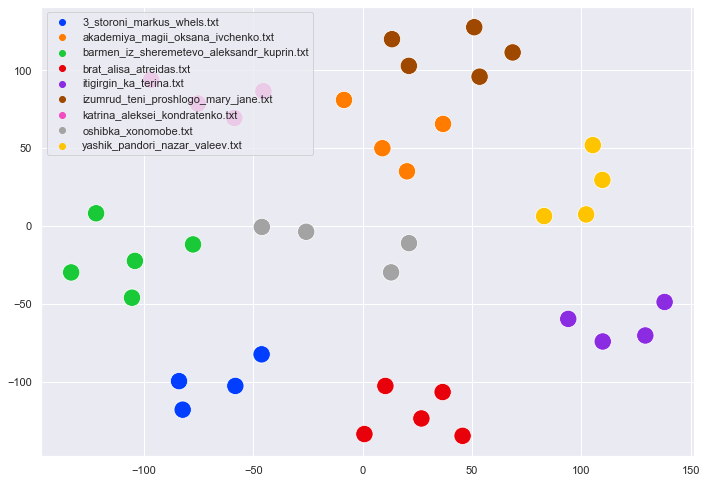

In [103]:
tsne =  TSNE(n_components=2, perplexity=10, random_state=17, metric='cosine')
tsne.fit(freqs_test_sc)
sns.scatterplot(tsne.embedding_[:,0], tsne.embedding_[:,1], legend='brief', hue=classes_test, palette=palette, s=300)

In [145]:
cd = distance.cdist(freqs_test_sc, freqs_sc, metric='cosine')

In [149]:
cd.argsort()

array([[3411,  926, 4916, ..., 3341, 1642, 4825],
       [2144,  239, 2142, ..., 4867, 3382, 4818],
       [2903,  134,   48, ..., 1438, 2995, 4470],
       ...,
       [2398, 2584, 3407, ..., 2048, 3558, 2540],
       [3200,  885, 3910, ..., 4530, 3280, 1301],
       [1511,  885, 4453, ..., 3481, 4440,  984]])

In [163]:
ids = sorted([f for f in os.listdir('ridero10/polka/chunks_processed') if not os.path.isdir(os.path.join('ridero10/polka/chunks_processed', f))])
ids_ridero10 = sorted([f for f in os.listdir('ridero10/chunks_processed') if f != 'wv.txt' and not os.path.isdir(os.path.join('ridero10/chunks_processed', f))])

In [166]:
distances=cd

In [167]:
for i, idx in enumerate(distances.argsort()[:,0]):
    print(i, ids_ridero10[i])
    print('Most similar to:', idx, ids[idx])
    print('similarity:', round(distances[i][idx], 3))
    print()

0 3_storoni_markus_whels.txt_0
Most similar to: 3411 391821.fb2.txt_3
similarity: 0.765

1 3_storoni_markus_whels.txt_1
Most similar to: 2144 239744.fb2.txt_3
similarity: 0.866

2 3_storoni_markus_whels.txt_2
Most similar to: 2903 324990.fb2.txt_3
similarity: 0.855

3 3_storoni_markus_whels.txt_3
Most similar to: 1214 169075.fb2.txt_0
similarity: 0.869

4 akademiya_magii_oksana_ivchenko.txt_0
Most similar to: 3716 42569.fb2.txt_3
similarity: 0.878

5 akademiya_magii_oksana_ivchenko.txt_1
Most similar to: 121 1070.fb2.txt_2
similarity: 0.849

6 akademiya_magii_oksana_ivchenko.txt_2
Most similar to: 96 1061.fb2.txt_5
similarity: 0.846

7 akademiya_magii_oksana_ivchenko.txt_3
Most similar to: 4078 461703.fb2.txt_6
similarity: 0.87

8 barmen_iz_sheremetevo_aleksandr_kuprin.txt_0
Most similar to: 218 114299.fb2.txt_0
similarity: 0.885

9 barmen_iz_sheremetevo_aleksandr_kuprin.txt_1
Most similar to: 624 146676.fb2.txt_8
similarity: 0.889

10 barmen_iz_sheremetevo_aleksandr_kuprin.txt_2
Most 

In [175]:
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [176]:
dir_in = 'txt_cut'
dir_out = 'ridero10/polka/mix5'
mix5 = '158030 158033 158036 158032 267779 287996 436421'.split()

# os.mkdir('ridero10/polka')
# os.mkdir(dir_out)
for name in tqdm(mix5):
    if name.startswith('.') or name == 'raw_chunks':
        continue
    with open(os.path.join(dir_in, name + '.fb2.txt')) as f:
        content = f.read().strip()
        content = content.replace('?..', '?').replace('!..', '!').replace('...', '…').replace('--', '–')
        content = re.sub('[…]+', ' … ', content)
        content = re.sub('\s+', ' ', content)
        content = re.sub('[_]+', '_', content)
        content = re.sub('[\n]+', ' \n ', content)
        content = re.sub('[*]+', '*', content)
        content = re.sub('\xa0', ' ', content)
        text = content.split(' ')
        for i, chunk in enumerate(chunks(text, 1050)):
            if len(chunk) < 500:
                continue
            with open(os.path.join(dir_out, name + f'_{i}'), 'w') as ff:
                ff.write(' '.join(chunk))

In [177]:
### Most Frequent Words

dir_name = 'ridero10/polka/mix5'
data_test = []
len_test = []
classes_test = []
for filename in sorted(os.listdir(dir_name)):
    with open(os.path.join(dir_name, filename), encoding='utf-8') as book:
        content = book.read()
        data_test.append(content)
        len_test.append(len(re.findall(u"(?u)\\b\\w+\\b", content)))
        classes_test.append(filename.rsplit('_', 1)[0])
        
data_test = np.array(data_test)
len_test = np.array(len_test)

td = pd.DataFrame(cv_mfw.transform(data_test).todense())
td.columns = sorted(cv_mfw.vocabulary_)
freqs_test = td.div(len_test, axis=0)
freqs_test_sc = sclr.transform(freqs_test)

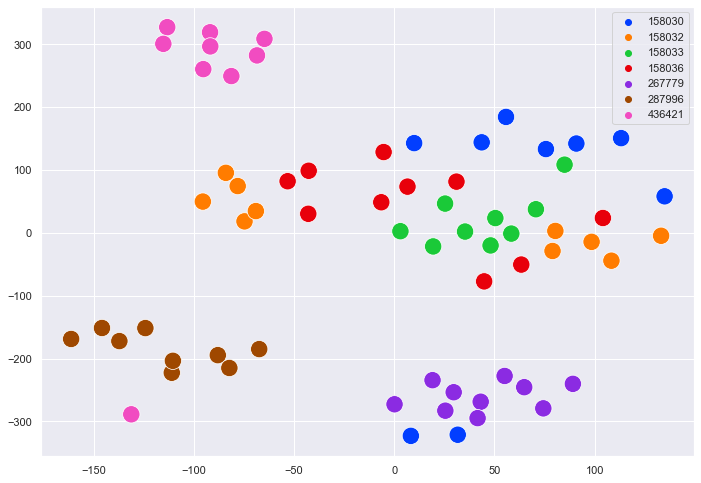

In [182]:
tsne =  TSNE(n_components=2, perplexity=10, random_state=17, metric='cosine')
tsne.fit(freqs_test_sc)
sns.scatterplot(tsne.embedding_[:,0], tsne.embedding_[:,1], legend='brief', hue=classes_test, palette=palette, s=300)

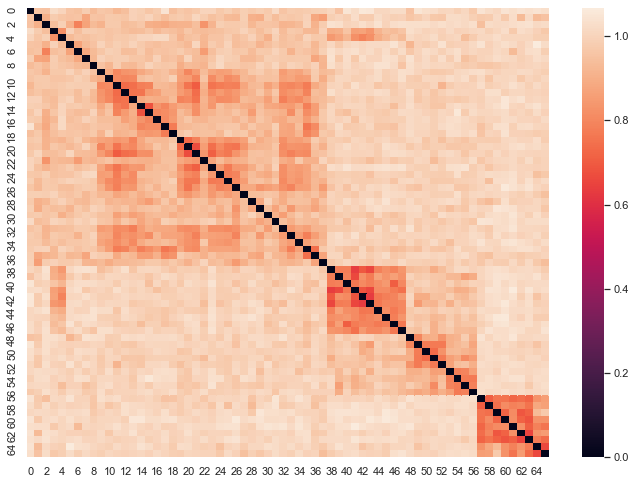

In [188]:
sns.heatmap(distance.squareform(distance.pdist(freqs_test_sc, metric='cosine')))